# Imports

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rpa as r
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Funciones utiles

In [ ]:
def vif_func(data):
    X = data._get_numeric_data() 

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                              for i in range(len(X.columns))]

    print(vif_data)

In [41]:
def get_data(csv_path='lol-data.csv'):
    r.init()
    r.url('https://oracleselixir.com/tools/downloads')
    r.timeout()
    data_url = r.read('//div[contains(@class, "mainContent")]/div[2]/div/div[3]/div[1]/div[1]/a//@href')
    r.download(data_url,csv_path)
    r.close()
    
    return pd.read_csv(csv_path)

# Data y Dimensiones

In [145]:
df = get_data()
print("las dimensiones del dataset son:",df.shape)
print("las columnas del dataset son:",df.shape[1])

las dimensiones del dataset son: (133140, 119)
las columnas del dataset son: 119


## Filtrado de columnas y Reduccion de Dimensionalidad
Seleccionamos las celdas de equipo ya que no vamos a analizar a cada jugador, solamente al equipo completo.
removemos las columnas que no nos interesan y dejamos las mas importantes.
eliminamos las columnas con NaN values completas y rellenamos con 0 donde no haya informacion ya que la mayoria son variables binarias.

In [146]:
df = df.loc[df['position'] == 'team']
df = df.drop(['gameid','datacompleteness','url','league','year','split','playoffs','date','game','patch','playerid','player','champion','ban1','ban2','ban3','ban4','ban5','firstbloodkill','firstbloodassist','firstbloodvictim','dragons (type unknown)','turretplates','opp_turretplates','damageshare','earnedgoldshare','total cs','goldat10','xpat10','csat10','opp_goldat10','opp_xpat10','opp_csat10','golddiffat10','xpdiffat10','csdiffat10','killsat10','assistsat10','deathsat10','opp_killsat10','opp_assistsat10','opp_deathsat10','goldat15','xpat15','csat15','opp_goldat15','opp_xpat15','opp_csat15','golddiffat15','xpdiffat15','csdiffat15','killsat15','assistsat15','deathsat15','opp_killsat15','opp_assistsat15','opp_deathsat15','team kpm','ckpm','opp_dragons','elementaldrakes','opp_elementaldrakes','opp_elders','opp_barons','opp_towers','opp_inhibitors','opp_heralds','teamkills','teamdeaths','doublekills','triplekills','quadrakills','pentakills','infernals','mountains','clouds','oceans','firstmidtower','firsttothreetowers','cspm','wcpm','dpm','damagetakenperminute','damagemitigatedperminute','wpm','vspm','earned gpm','gspd'],axis=1)
df = df.dropna(how='all')
df = df.fillna(0)
print("las nuevas dimensiones del dataset son:",df.shape)
print("las nuevas columnas del dataset son:",df.shape[1])

las nuevas dimensiones del dataset son: (22190, 31)
las nuevas columnas del dataset son: 31


## Revision de los Datos
Checkeamos que no hayan datos **Null o NaN**

In [4]:
df.isnull().sum()

side                       0
position                   0
team                       0
gamelength                 0
result                     0
kills                      0
deaths                     0
assists                    0
firstblood                 0
firstdragon                0
dragons                    0
elders                     0
firstherald                0
heralds                    0
firstbaron                 0
barons                     0
firsttower                 0
towers                     0
inhibitors                 0
damagetochampions          0
wardsplaced                0
wardskilled                0
controlwardsbought         0
visionscore                0
totalgold                  0
earnedgold                 0
goldspent                  0
minionkills                0
monsterkills               0
monsterkillsownjungle      0
monsterkillsenemyjungle    0
dtype: int64

## Tipos de datos
Revisamos el tipo de cada variable

In [5]:
df.dtypes

side                        object
position                    object
team                        object
gamelength                   int64
result                       int64
kills                        int64
deaths                       int64
assists                      int64
firstblood                 float64
firstdragon                float64
dragons                    float64
elders                     float64
firstherald                float64
heralds                    float64
firstbaron                 float64
barons                     float64
firsttower                 float64
towers                     float64
inhibitors                 float64
damagetochampions          float64
wardsplaced                float64
wardskilled                float64
controlwardsbought         float64
visionscore                float64
totalgold                    int64
earnedgold                 float64
goldspent                  float64
minionkills                float64
monsterkills        

## Explicacion de las variables:
1. **side (categorica/binaria):** lado donde jugo el equipo, rojo o azul
2. **position (categorica):** posicion del jugador (esta columna se dejo ya que es la que nos permite filtrar por equipos, solamente por eso)
3. **team (categorica):** nombre del equipo
4. **gamelenght (entera):** duracion de la partida en segundos
5. **result (binaria):** resultado de la partida 1 si el equipo gano, 0 si no
6. **kills (entera):** cantidad de asesinatos del equipo
7. **deaths (entera):** cantidad de muertes del equipo
8. **assists (entera):** cantidad de asistencias del equipo
9. **firstblood (binaria):** primera sangre, 1 si el equipo obtuvo la primera sangre, 0 si no
10. **firstdragon (binaria):** primer dragon, 1 si el equipo obtuvo el primer dragon, 0 si no
11. **dragons (entera):** cantidad de dragondes del equipo 
12. **elders (entera):** cantidad de dragones ancianos del equipo
13. **firstherald (binaria):** primer heraldo, 1 si el equipo obtuvo el primer heraldo, 0 si no
14. **heralds (entera):** cantidad de heraldos del equipo (Max 2)
15. **firstbaron (binaria):** primer baron nashor, 1 si el equipo obtuvo el primer baron nashor, 0 si no
16. **barons (entera):** cantidad de barones nashor del equipo
17. **firsttower (binaria):** primera torre destruida, 1 si el equipo destruyo la primera torre de la partida, 0 si no
18. **towers (entera):** cantidad de torres destruidas por el equipo (Max 11)
19. **inhibitors (entera):** cantidad de inhibidores destruidos por el equipo
20. **damagetochampions (entera):** dano total realizado hacia campeones enemigos por el equipo
21. **wardsplaced (entera):** cantidad de wards colocados por el equipo
22. **wardskilled (entera):** cantidad de wards enemigos eliminados por el equipo
23. **controlwardsbought (entera):** cantidad de wards de control comprados por el equipo
24. **visionscore (entera):** puntuacion total de vision del equipo
25. **totalgold (entera):** cantidad total de oro del equipo
26. **earnedgold (entera):** cantidad de oro ganada por el equipo
27. **goldspent (entera):** cantidad de oro gastada por el equipo
28. **minionkills (entera):** cantidad de minions(subditos) eliminados por el equipo
29. **monsterkills (entera):** cantidad de mounstros neutrales eliminados por el equipo
30. **monsterkillsownjungle (entera):** cantidad de mounstros neutrales de la jungla del equipo eliminados por el equipo
31. **monsterkillsenemyjungle (entera):** cantidad de mounstros neutrales de la jungla enemiga eliminados por el equipo

# Data filtrada numerica

In [120]:
side = pd.get_dummies(df[['side']],dtype=float)
df2 = df[['result','gamelength','kills','deaths','assists','totalgold','dragons','elders','heralds','barons','towers','inhibitors','damagetochampions','wardsplaced','wardskilled','controlwardsbought','visionscore','earnedgold','goldspent','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle','firstblood','firstdragon','firstherald','firstbaron','firsttower']].copy()
df2[['blue side','red side']] = side

In [121]:
df2.head()

,result,gamelength,kills,deaths,assists,totalgold,dragons,elders,heralds,barons,towers,inhibitors,damagetochampions,wardsplaced,wardskilled,controlwardsbought,visionscore,earnedgold,goldspent,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,firstblood,firstdragon,firstherald,firstbaron,firsttower,blue side,red side
10,1,1782,23,4,41,61153,4.0,0.0,2.0,1.0,9.0,2.0,73968.0,102.0,45.0,44.0,254.0,41599.0,56350.0,786.0,310.0,152.0,76.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
11,0,1782,4,24,5,44646,0.0,0.0,0.0,0.0,0.0,0.0,33521.0,98.0,40.0,37.0,184.0,25092.0,43500.0,812.0,123.0,96.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22,0,1753,7,18,18,47184,0.0,0.0,1.0,0.0,3.0,0.0,43465.0,92.0,30.0,37.0,196.0,27925.0,44775.0,724.0,192.0,149.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
23,1,1753,18,7,43,55488,4.0,0.0,0.0,1.0,7.0,1.0,76657.0,95.0,36.0,39.0,231.0,36229.0,47125.0,778.0,221.0,151.0,16.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
34,0,1777,10,20,16,45566,0.0,0.0,2.0,0.0,3.0,0.0,43080.0,97.0,42.0,35.0,187.0,26063.0,44660.0,626.0,137.0,105.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## descripcion estadistica

In [110]:
df2.describe()

,result,gamelength,kills,deaths,assists,totalgold,dragons,elders,heralds,barons,towers,inhibitors,damagetochampions,wardsplaced,wardskilled,controlwardsbought,visionscore,earnedgold,goldspent,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,firstblood,firstdragon,firstherald,firstbaron,firsttower,blue side,red side
count,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000
mean,0.499955,1884.482109,14.490266,14.520370,32.659171,55755.055205,2.252997,0.044525,0.792970,0.665210,5.839928,0.886616,62642.546958,99.076070,42.831546,38.858224,203.128166,35142.248986,51548.771834,760.121316,207.781613,127.319243,17.420279,0.499685,0.454709,0.454394,0.428571,0.455791,0.500000,0.500000
std,0.500011,334.099804,7.548827,7.548459,18.155563,11088.772109,1.381321,0.218980,0.808014,0.717148,3.625038,1.046891,21864.635938,29.336225,17.007937,12.042536,92.609328,8410.514091,10416.015760,158.717335,50.647080,47.653221,15.239634,0.500011,0.497956,0.497927,0.494883,0.498053,0.500011,0.500011
min,0.000000,911.000000,0.000000,0.000000,0.000000,20806.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-573.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1655.000000,8.000000,8.000000,17.000000,48285.250000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47389.500000,79.000000,31.000000,30.000000,161.000000,29046.250000,44511.250000,659.000000,172.000000,109.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1851.000000,14.000000,14.000000,32.000000,55463.500000,2.000000,0.000000,1.000000,1.000000,7.000000,1.000000,59885.000000,96.000000,41.000000,38.000000,210.000000,35578.000000,50925.000000,757.000000,206.000000,132.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,1.000000,2079.000000,20.000000,20.000000,46.000000,62871.000000,3.000000,0.000000,1.000000,1.000000,9.000000,1.000000,74512.000000,116.000000,53.000000,46.000000,260.000000,40955.250000,57800.000000,858.000000,240.000000,156.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,4643.000000,53.000000,53.000000,110.000000,120870.000000,7.000000,3.000000,2.000000,4.000000,11.000000,10.000000,253331.000000,326.000000,186.000000,103.000000,730.000000,76489.000000,130820.000000,1744.000000,522.000000,309.000000,132.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## matriz de correlacion

<AxesSubplot:>

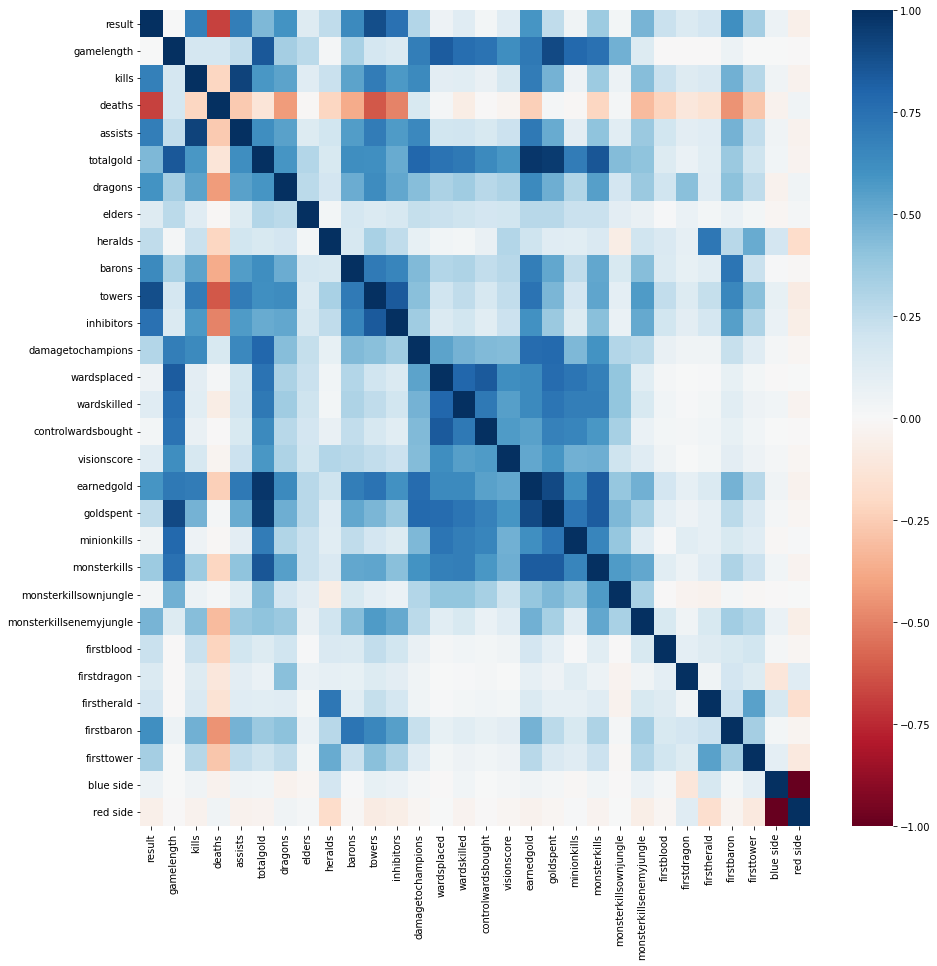

In [112]:
c=df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(c,cmap='RdBu')

podemos notar las variables con **gran correlacion** de color **azul**, las variables con **correlacion inversa** de color **rojo** y por ultimo las variables con poca o **nula correlacion** de color **blanco**

## Variable objetivo, categoricas y enteras

In [123]:
y = df2[['result']]

enteras = df2[['gamelength','kills','deaths','assists','totalgold','dragons','elders','heralds','barons','towers','inhibitors','damagetochampions','wardsplaced','wardskilled','controlwardsbought','visionscore','earnedgold','goldspent','minionkills','monsterkills','monsterkillsownjungle','monsterkillsenemyjungle']]
binarias = df2[['firstblood','firstdragon','firstherald','firstbaron','firsttower','blue side','red side']]

# Graficos

## Side vs Result

<AxesSubplot:xlabel='side', ylabel='result'>

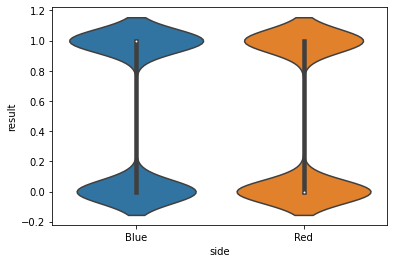

In [118]:
sns.violinplot(x='side', y=df2['result'], data=df)

<AxesSubplot:xlabel='result', ylabel='blue side'>

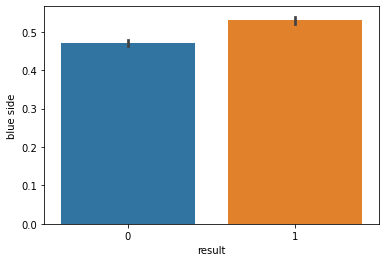

In [130]:
sns.barplot(y=df2['blue side'], x=df2['result'])

<AxesSubplot:xlabel='result', ylabel='red side'>

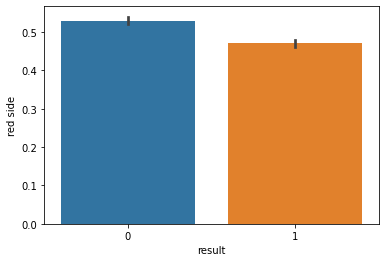

In [131]:
sns.barplot(y=df2['red side'], x=df2['result'])

A simple vista podemos notar que la distribucion del lado rojo como del lado azul es equitativa, por otra parte podemos notar una muy pequeña diferencia entre los equipos que ganan dependiendo el lado, podemos observar que donde mas ganan los equipos es en el **lado azul**

## Distribuciones

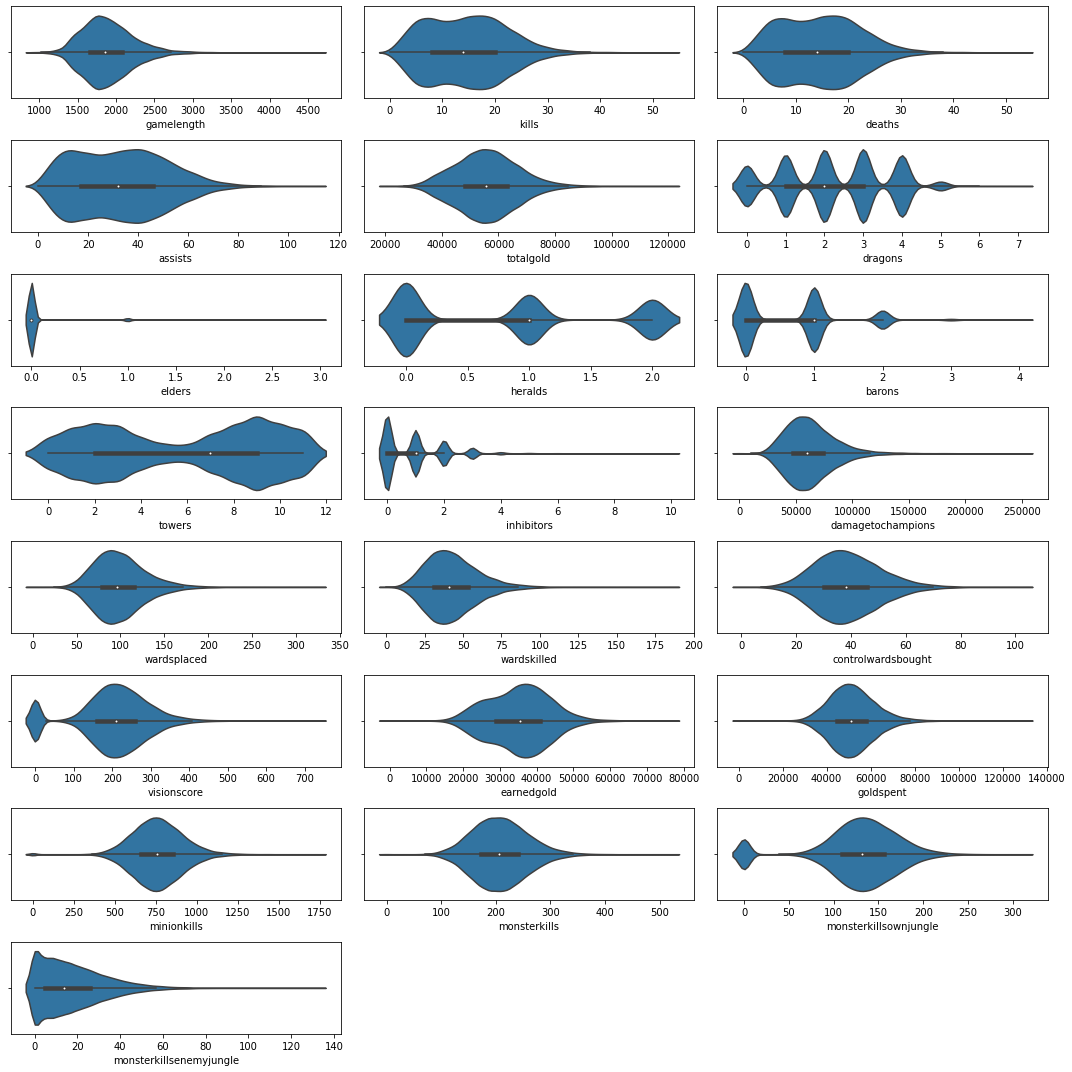

In [79]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(8, 3)

cx=0
cy=0

for i in enteras.columns:
    if cx == 3:
        cy+=1
        cx=0
    ax = fig.add_subplot(gs[cy, cx])
    sns.violinplot(x=df[i])
    cx+=1
    
fig.tight_layout()
plt.show()

## Outliers

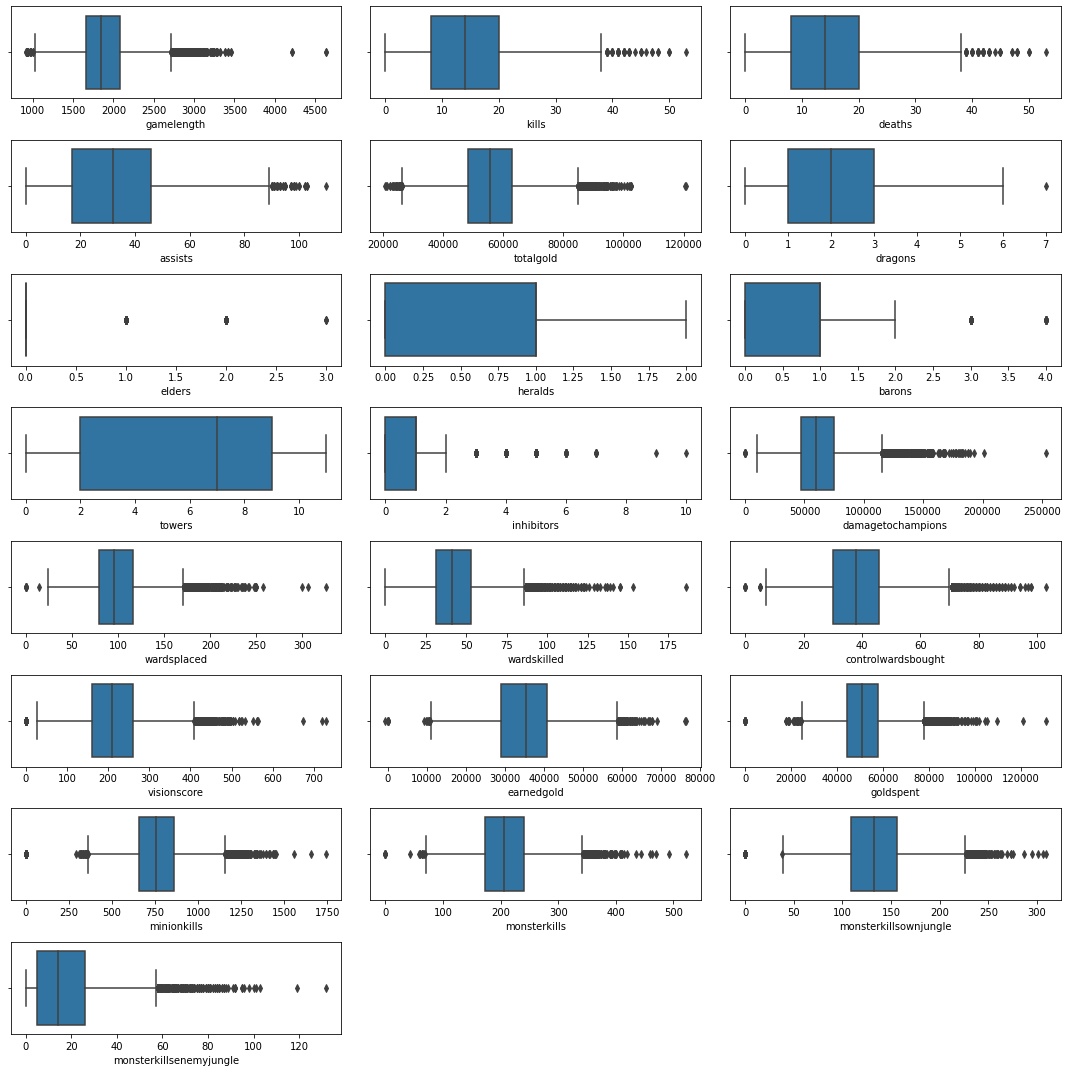

In [80]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(8, 3)

cx=0
cy=0

for i in enteras.columns:
    if cx == 3:
        cy+=1
        cx=0
    ax = fig.add_subplot(gs[cy, cx])
    sns.boxplot(x=df[i])
    cx+=1
    
fig.tight_layout()
plt.show()

podemos notar que en las variables enteras existen muchos outliers, a exepcion de **towers y herlads**

## Variables binarias vs Result

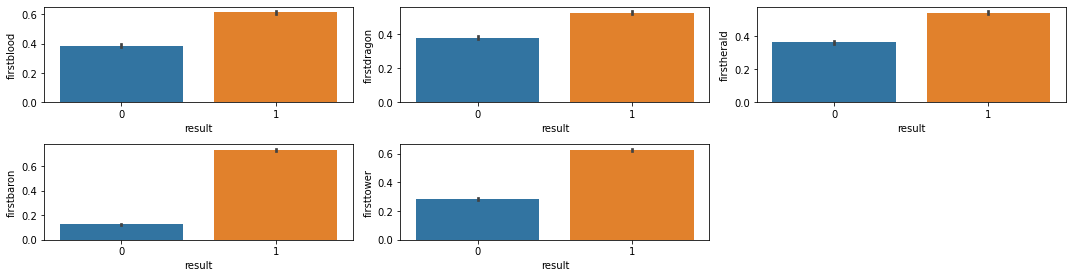

In [132]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(8, 3)

cx=0
cy=0

for i in binarias.columns:
    if cx == 3:
        cy+=1
        cx=0
    if i == 'blue side':
        continue
    if i == 'red side':
        continue
    else:
        ax = fig.add_subplot(gs[cy, cx])
        sns.barplot(y=df[i],x=df['result'])
    cx+=1
    
fig.tight_layout()
plt.show()

De los graficos podemos ver una tendencia, que la mayoria de equipos que ganan son los equipos que lograron la **primera sangre, el primer dragon, el primer heraldo, el primer baron y la primera torre.**

## Variables Enteras vs Result

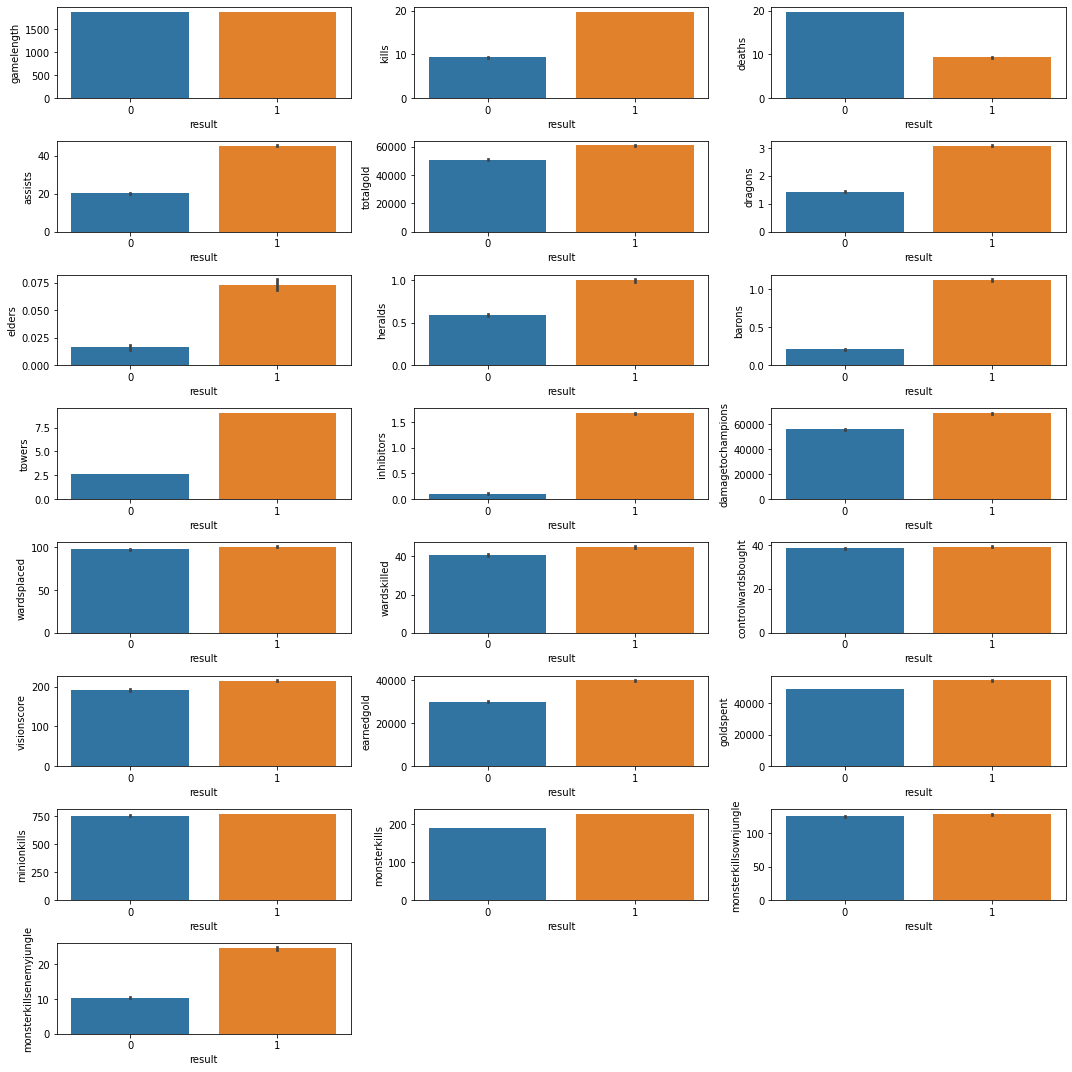

In [73]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(8, 3)
 
cx=0
cy=0

for i in enteras.columns:
    if cx == 3:
        cy+=1
        cx=0
    ax = fig.add_subplot(gs[cy, cx])
    sns.barplot(y=df[i],x=df['result'])
    cx+=1
    
fig.tight_layout()
plt.show()

 con estos graficos podemos observar que la **duracion de la partida, wardsplaced, wardskilled, controlwardsbought, visionscore, goldspent, minionkills, monsterkillsownjungle** no afecta a los resultados, en cambio los equipos que ganan tienen mas: **kills, asistencias, oro , dragones, elders, heralds, barons, towers, inhibitors, damagetochampions , earnedgold, monsterkills y monsterkillsenemyjungle.** que los que pierden, por ultimo los equipos que pierden tienen mas **deaths**

## Variance Inflation Factor
Un **VIF** mayor a 5 indica una gran **multicolinealidad**

In [139]:
vif_func(df2)

                    feature         VIF
0                    result    8.160759
1                gamelength   51.977082
2                     kills   13.956333
3                    deaths    3.552582
4                   assists    8.391192
5                 totalgold  312.382916
6                   dragons    2.877658
7                    elders    1.179804
8                   heralds    3.154058
9                    barons    4.313282
10                   towers   13.578153
11               inhibitors    3.774636
12        damagetochampions    4.897883
13              wardsplaced    6.083910
14              wardskilled    3.560054
15       controlwardsbought    3.755047
16              visionscore    2.478607
17               earnedgold  160.150724
18                goldspent   25.236486
19              minionkills    4.569191
20             monsterkills    7.529628
21    monsterkillsownjungle    1.742248
22  monsterkillsenemyjungle    2.132837
23               firstblood    1.128105


# Data filtrada por correlacion
Ahora nos quedamos con las columas con mayor correlacion para nuestra variable objetivo que es el **resultado**, si el equipo gano o no la partida

In [147]:
df3 = df[['result','kills', 'deaths', 'assists', 'totalgold','dragons','barons', 'towers', 'inhibitors', 'earnedgold','firstbaron']].copy()
print("las dimensiones del dataset son:",df3.shape)
print("las columnas del dataset son:",df3.shape[1])

las dimensiones del dataset son: (22190, 11)
las columnas del dataset son: 11


## Descripcion Estadistica

In [141]:
df3.describe()

,result,kills,deaths,assists,totalgold,dragons,barons,towers,inhibitors,earnedgold,firstbaron
count,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000,22190.000000
mean,0.499955,14.490266,14.520370,32.659171,55755.055205,2.252997,0.665210,5.839928,0.886616,35142.248986,0.428571
std,0.500011,7.548827,7.548459,18.155563,11088.772109,1.381321,0.717148,3.625038,1.046891,8410.514091,0.494883
min,0.000000,0.000000,0.000000,0.000000,20806.000000,0.000000,0.000000,0.000000,0.000000,-573.000000,0.000000
25%,0.000000,8.000000,8.000000,17.000000,48285.250000,1.000000,0.000000,2.000000,0.000000,29046.250000,0.000000
50%,0.000000,14.000000,14.000000,32.000000,55463.500000,2.000000,1.000000,7.000000,1.000000,35578.000000,0.000000
75%,1.000000,20.000000,20.000000,46.000000,62871.000000,3.000000,1.000000,9.000000,1.000000,40955.250000,1.000000
max,1.000000,53.000000,53.000000,110.000000,120870.000000,7.000000,4.000000,11.000000,10.000000,76489.000000,1.000000


## matriz de correlacion

<AxesSubplot:>

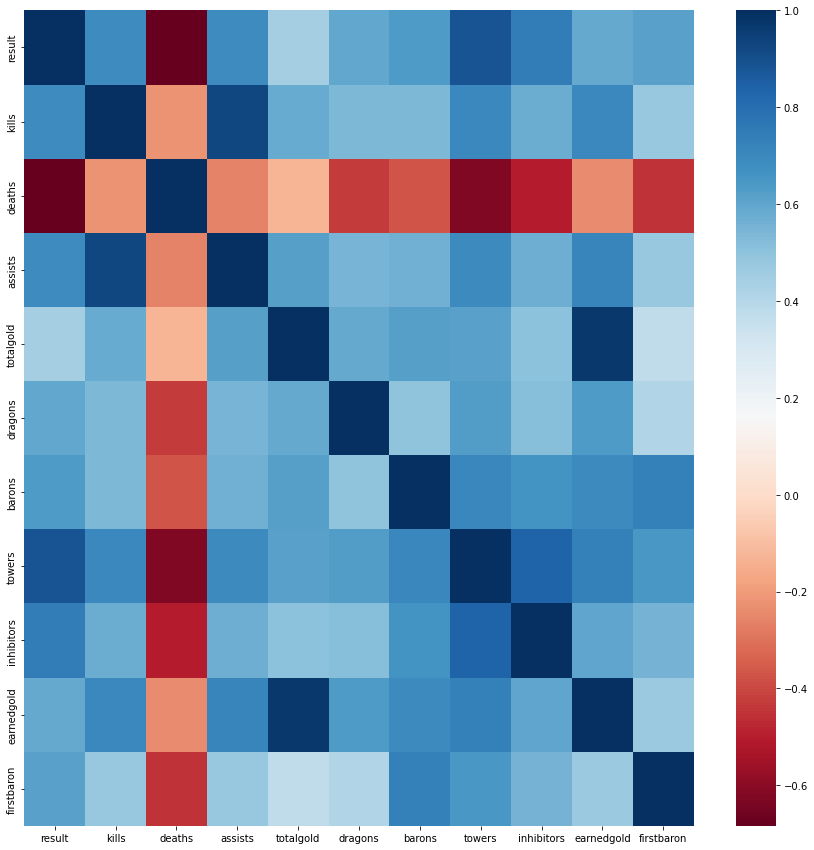

In [136]:
d=df3.corr()
plt.figure(figsize=(15,15))
sns.heatmap(d,cmap='RdBu')

## Variance Inflation Factor
Un **VIF** mayor a 5 indica una gran **multicolinealidad**

In [140]:
vif_func(df3)

       feature          VIF
0       result    12.491862
1        kills    43.751576
2       deaths    12.276373
3      assists    31.728595
4    totalgold   948.881078
5      dragons     7.419383
6       barons     5.966104
7       towers    38.550837
8   inhibitors     6.165714
9   earnedgold  1112.368832
10  firstbaron     4.286697
